# Exploratory Data Analysis in Python for Beginners

- We will be using a dataset containing data from the English Premier League between 2000 and 2022.
- We will be using DataFrames to examine the dataset in different ways, along with line plots, bar plots, and scatter plots.

In [1]:
# Import necessary libraries for data visualization and display
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import pandas as pd              # Pandas for data manipulation and analysis
import seaborn as sns            # Seaborn for statistical data visualization

# Import display and Markdown from IPython.display package
from IPython.display import display, Markdown


In [2]:
# Read the English Premier League data from a CSV file into a Pandas DataFrame
epl = pd.read_csv("EPL.csv")

# Display concise information about the DataFrame, including the data types and non-null counts
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


In [3]:
# Display first few rows.
epl.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


In [4]:
# Select relevant columns.
epl_con = epl[['Season','Team','Pos','Pts','GF','GD','Qualification or relegation']]

In [5]:
# Display first rows.
epl_con.head()

,Season,Team,Pos,Pts,GF,GD,Qualification or relegation
0,2000-01,Manchester United,1,80,79,48,Qualification for the Champions League first g...
1,2000-01,Arsenal,2,70,63,25,Qualification for the Champions League first g...
2,2000-01,Liverpool,3,69,71,32,Qualification for the Champions League third q...
3,2000-01,Leeds United,4,68,64,21,Qualification for the UEFA Cup first round[a]
4,2000-01,Ipswich Town,5,66,57,15,Qualification for the UEFA Cup first round[a]


In [6]:
# Update for Champions League.
def update_result(result):
    if 'Champions League' in result:
        result = 'Champions League'
    # Update for Europa League.
    elif 'Europa' in result or 'UEFA' in result:
        result = 'Europa'
    # Update for Relegation.
    elif 'Relegation' in result:
        result = 'Relegation'
    # Default to '-'
    else:
        result = '-'
    return result

In [7]:
# Rename column for clarity.
epl_con = epl_con.rename(columns={"Qualification or relegation": "Result"})

# Apply result update function.
epl_con["Result"] = epl_con["Result"].apply(update_result)

In [8]:
# Display first rows of updated DataFrame.
epl_con.head()

,Season,Team,Pos,Pts,GF,GD,Result
0,2000-01,Manchester United,1,80,79,48,Champions League
1,2000-01,Arsenal,2,70,63,25,Champions League
2,2000-01,Liverpool,3,69,71,32,Champions League
3,2000-01,Leeds United,4,68,64,21,Europa
4,2000-01,Ipswich Town,5,66,57,15,Europa


In [9]:
# Count occurrences of each result.
epl_con["Result"].value_counts()

Result
-                   220
Champions League     89
Europa               68
Relegation           63
Name: count, dtype: int64

In [10]:
# Select Champions League qualifiers.
cl_ql = epl_con[epl_con.Result == "Champions League"]

# Aggregate statistics for each season.
cl_ql_stats = cl_ql.groupby('Season').agg({'Pos': 'max', 'Pts': 'min', 'GD': 'min'})

In [11]:
# Display Champions League qualifiers' statistics.
cl_ql_stats

,Pos,Pts,GD
Season,,,
2000-01,3,69,25
2001-02,4,71,22
2002-03,4,67,15
2003-04,4,60,18
2004-05,5,58,-1
2005-06,4,67,32
2006-07,4,68,28
2007-08,4,76,39
2008-09,4,72,31


In [12]:
# Select Europa League qualifiers.
eu_ql = epl_con[epl_con.Result == "Europa"]

# Aggregate statistics for each season.
eu_ql_stats = eu_ql.groupby('Season').agg({'Pos': 'max', 'Pts': 'min', 'GD': 'min'})

In [13]:
# Display Europa League qualifiers' statistics.
eu_ql_stats

,Pos,Pts,GD
Season,,,
2000-01,6,61,15
2001-02,18,36,-23
2002-03,9,51,-7
2003-04,11,48,-8
2004-05,7,55,5
2005-06,9,55,-3
2006-07,7,56,-5
2007-08,11,46,-8
2008-09,7,53,5


Observations

Upon analyzing the EPL data, we've identified several interesting patterns:

- Teams generally secure Champions League qualification with 70+ points, but exceptions exist.
- Europa League qualification typically requires around 55 points.
- Goal Difference (GD) exhibits a wide range and isn't a reliable predictor of qualification.

Outliers

We've identified a few noteworthy outliers:

1. **Champions League Qualification:**
   - Only on three occasions has a team below the 4th position qualified for the Champions League.
   - Qualifying for the Champions League with under 60 points has happened only once.
      - In that exceptional year, a team also secured qualification with a negative GD (the only instance with <10 GD).

2. **Europa League and Relegation:**
   - On three separate occasions, a team has qualified for the Europa League and faced relegation in the same year.

In [14]:
# Select teams that won the EPL.
epl_win = epl_con[epl_con['Pos'] == 1]

# Reset index for clarity.
epl_win = epl_win.reset_index(drop=True)

In [15]:
# Select teams in relegation zone.
rel_zone = epl_con[epl_con['Pos'] == 18]

# Reset index for clarity.
rel_zone = rel_zone.reset_index(drop=True)

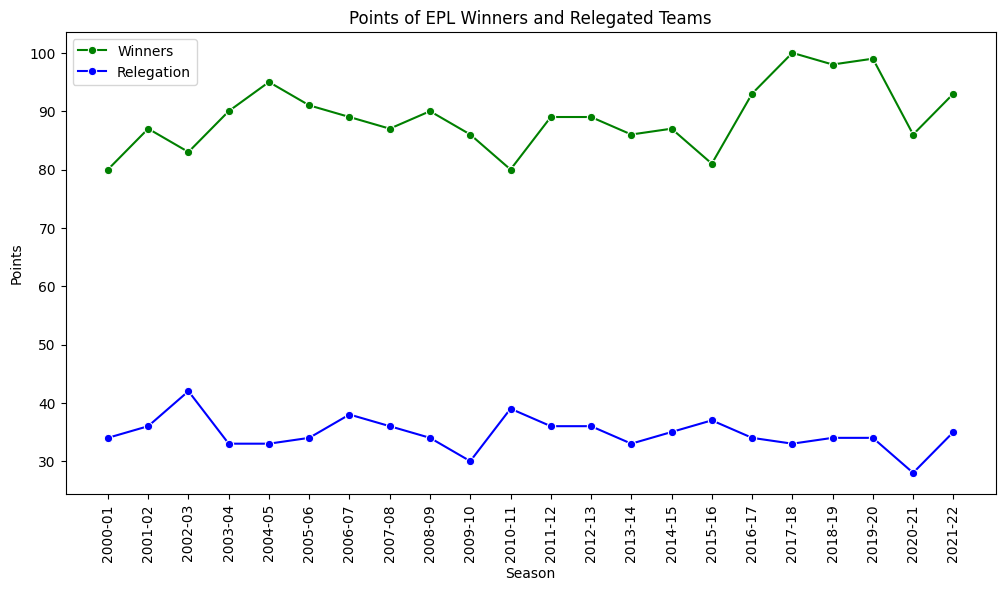

In [16]:
# Plot EPL winners and relegated teams' points over seasons.
plt.figure(figsize=(12, 6))

# Plot line for EPL winners.
sns.lineplot(x='Season', y='Pts', data=epl_win, marker='o', color='green', label="Winners")

# Plot line for relegated teams.
sns.lineplot(x='Season', y='Pts', data=rel_zone, marker='o', color='blue', label="Relegation")

# Customize plot.
plt.xticks(rotation=90)
plt.title("Points of EPL Winners and Relegated Teams")
plt.xlabel("Season")
plt.ylabel("Points")

# Display the plot.
plt.show()

Correlation between Points to Win the Premier League and Avoid Relegation

- A weak negative correlation of `-0.3` is observed between the points needed to win the Premier League and the points required to avoid relegation.
    - A negative correlation implies that when top teams perform exceptionally well, the threshold for avoiding relegation tends to be lower.
    - Possible reasons for this negative correlation warrant further exploration.

- On average, there exists a 54-point gap between the top and bottom of the league.
    - The _best_ relegated team typically falls within the range of 30 to 40 points, with an average around 35 points.

- Notably, no team has won the league with less than 80 points since the 2000-01 season.

- While the data suggests a slow increase in the points needed to win the league, the points required to avoid relegation appear to remain relatively stable.
    - It's essential to note that the dataset might be insufficient to draw definitive conclusions on this trend.


In [17]:
# Calculate the mean point difference between EPL winners and relegated teams.
epl_win.Pts.sub(rel_zone.Pts).mean()

54.31818181818182

In [18]:
# Calculate the correlation between points of EPL winners and relegated teams.
epl_win.Pts.corr(rel_zone.Pts)

-0.31466918678660794

In [19]:
# Count occurrences of each team.
teams= epl_con['Team'].value_counts()

# Display team occurrences.
teams

Team
Manchester United          22
Everton                    22
Liverpool                  22
Arsenal                    22
Chelsea                    22
Tottenham Hotspur          22
Manchester City            21
Newcastle United           20
Aston Villa                19
West Ham United            19
Fulham                     15
Southampton                15
Sunderland                 14
West Bromwich Albion       13
Blackburn Rovers           11
Bolton Wanderers           11
Leicester City             11
Middlesbrough              10
Stoke City                 10
Crystal Palace             10
Burnley                     8
Wolverhampton Wanderers     8
Wigan Athletic              8
Portsmouth                  7
Watford                     7
Charlton Athletic           7
Swansea City                7
Birmingham City             7
Norwich City                7
Leeds United                6
Hull City                   5
Bournemouth                 5
Brighton & Hove Albion      5
Queen

In [20]:
# Identify teams in European competitions.
euro_ids = epl_con['Result'].isin(['Europa', 'Champions League'])
euro_ids

0       True
1       True
2       True
3       True
4       True
       ...  
435    False
436    False
437    False
438    False
439    False
Name: Result, Length: 440, dtype: bool

In [21]:
# Count European competition appearances for each team.
euro_yr = epl_con[euro_ids]['Team'].value_counts()
print(euro_yr)

Team
Manchester United          21
Chelsea                    21
Arsenal                    21
Liverpool                  19
Tottenham Hotspur          16
Manchester City            15
Everton                     6
West Ham United             5
Newcastle United            4
Blackburn Rovers            3
Southampton                 3
Leicester City              3
Ipswich Town                2
Middlesbrough               2
Bolton Wanderers            2
Leeds United                2
Aston Villa                 2
Fulham                      2
Wigan Athletic              1
Burnley                     1
Hull City                   1
Portsmouth                  1
Swansea City                1
Birmingham City             1
Stoke City                  1
Wolverhampton Wanderers     1
Name: count, dtype: int64


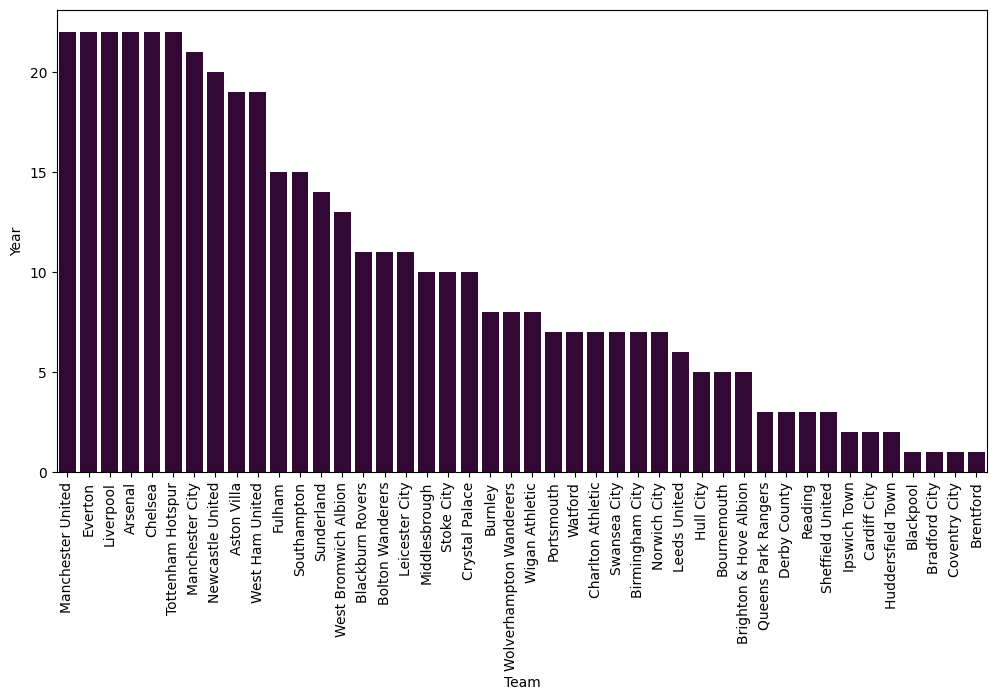

In [22]:
# Plot bar chart of team occurrences.
plt.figure(figsize=(12, 6))

# Create a bar plot using seaborn.
sns.barplot(data=teams, color='#38003c')

# Customize plot.
plt.ylabel("Year")
plt.xticks(rotation=90)

# Display the plot.
plt.show()

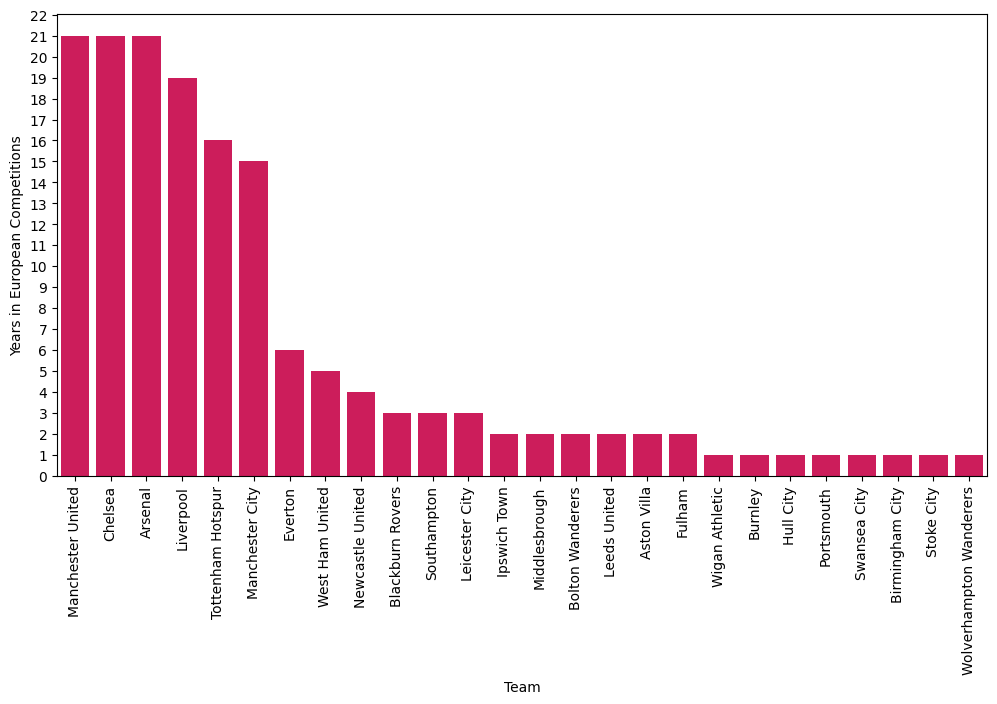

In [23]:
# Plot bar chart of years in European competitions for each team.
plt.figure(figsize=(12, 6))

# Create a bar plot using seaborn for European competition years.
sns.barplot(data=euro_yr, color='#e90052', label="Years in Europe")

# Customize plot.
plt.ylabel("Years in European Competitions")
plt.xticks(rotation=90)
plt.yticks(range(0, 23, 1))

# Display the plot.
plt.show()

Chelsea's European Competition Qualification

- The bar chart illustrates that Chelsea has consistently qualified for a European competition in every season from 2000-01 until 2021-22, except for the 2015-16 season.
  - An outlier on the chart corresponds to the exceptional season when Chelsea did not participate in European competitions.
  - Notably, Chelsea rebounded strongly the following year, clinching the Premier League title.


C:\Users\Pratham\AppData\Local\Temp\ipykernel_24880\1242662711.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


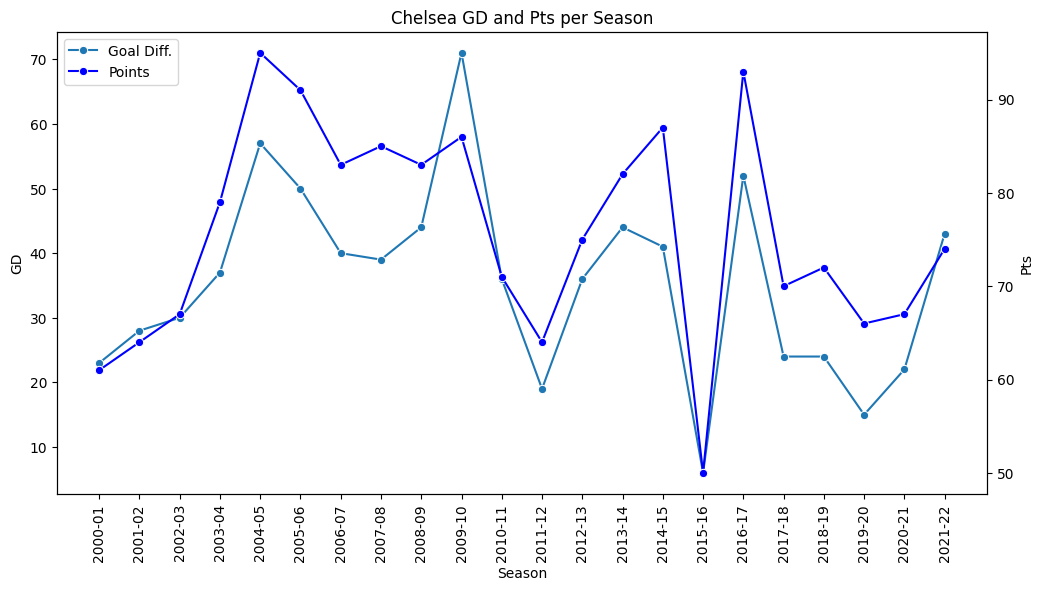

In [24]:
# Select data for Chelsea.
chelsea = epl_con[epl_con.Team == "Chelsea"]

# Plot line chart for Goal Difference and Points per season.
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="Season", y='GD', data=chelsea, label="Goal Diff.", marker="o")
ax2 = ax.twinx()

sns.lineplot(x="Season", y='Pts', data=chelsea, label="Points", ax=ax2, marker="o", color='blue')

# Combine legends from both axes.
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc="upper left")

# Remove legend from the second axis.
ax2.get_legend().remove()

# Customize plot.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Chelsea GD and Pts per Season")

# Display the plot.
plt.show()


Correlation between Points and Goal Difference

- While the Y-axes on the chart are independent, it serves to compare the shapes of two series: the number of points achieved and the goal difference for each season.
- The lines exhibit a remarkably similar shape, suggesting a reasonably strong correlation between a team's points and goal difference.
- Given the limited dataset of 21 seasons, further testing on a larger dataset may provide more robust insights into this correlation.


In [25]:
# Calculate average Goal Difference and Points for each team.
epl_team_stats = epl.groupby("Team").agg({'GD': 'mean', 'Pts': 'mean'}).round(1)

In [26]:
# Calculate correlation between Goal Difference and Points for teams.
corr = epl_team_stats['GD'].corr(epl_team_stats['Pts']).round(2)
corr

0.99

- The scatter plot reveals a tight grouping of teams along an imaginary line.
- A very strong correlation, indicated by the correlation coefficient of 0.99, is observed between the average points per season a team earns and their average goal difference.
    - This reinforces the initial hypothesis drawn from the smaller dataset (Chelsea) and highlights the consistent relationship between a team's average points and goal difference.

- It's crucial to exercise caution as such a high correlation may not always be the norm and might vary across different datasets.


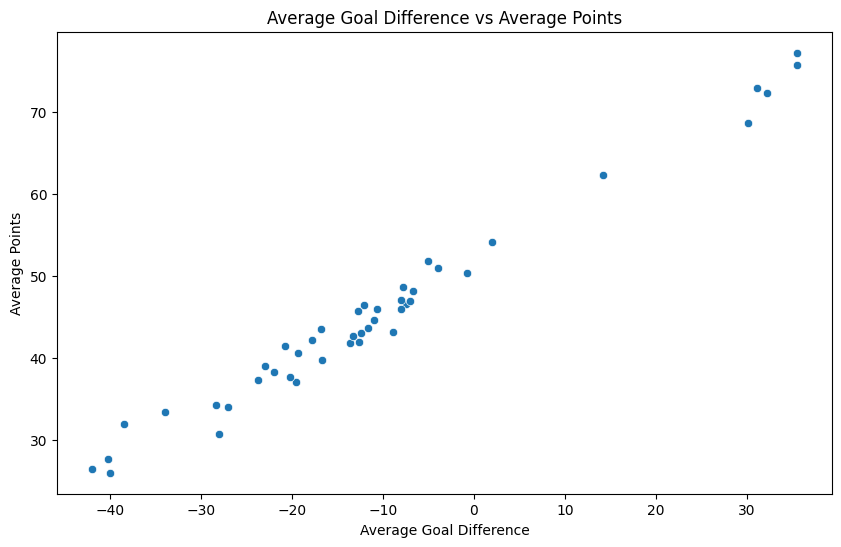

In [27]:
# Plot scatter plot of Average Goal Difference vs Average Points for teams.
plt.figure(figsize=(10, 6))

# Create a scatter plot using seaborn.
sns.scatterplot(x="GD", y="Pts", data=epl_team_stats)

# Customize plot.
plt.title('Average Goal Difference vs Average Points')
plt.xlabel('Average Goal Difference')
plt.ylabel('Average Points')

# Display the plot.
plt.show()

In [28]:
# Top Goal Scorers Analysis
top_scorers = epl.groupby(['Season', 'Team'])['GF'].sum().reset_index()
top_scorers = top_scorers.sort_values(['Season', 'GF'], ascending=[True, False]).groupby('Season').head(1)

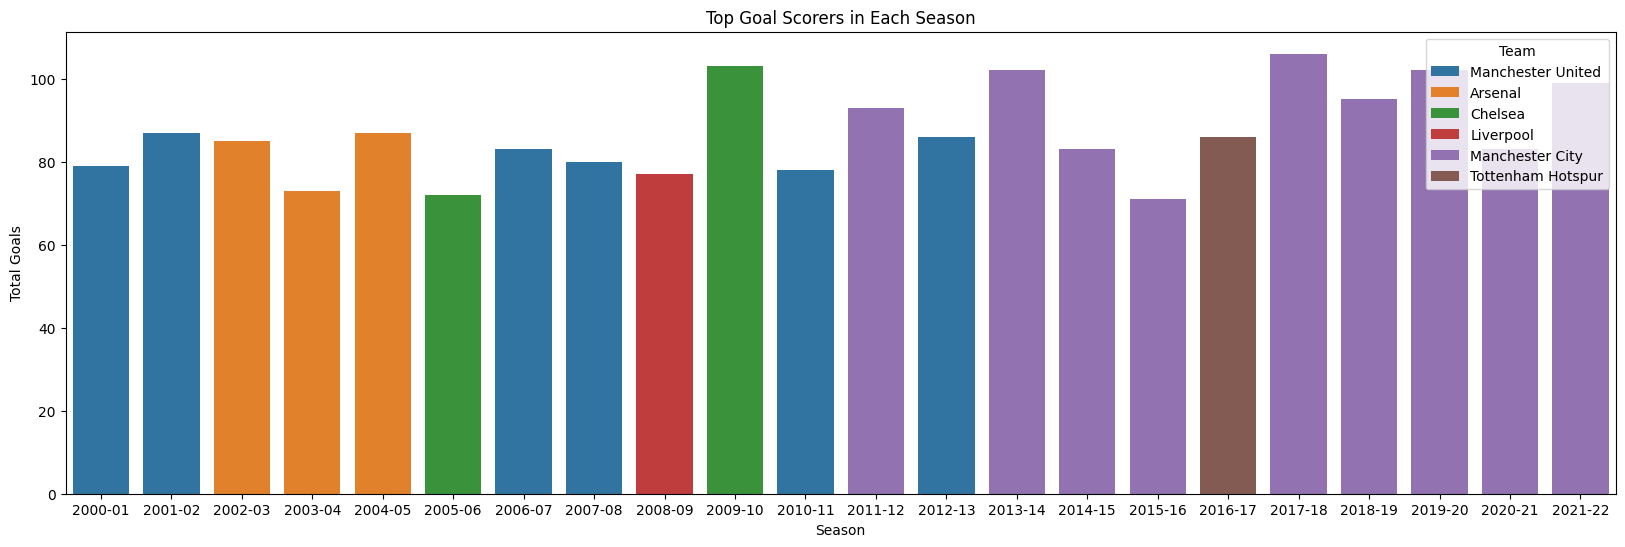

In [29]:
# Plot Bar Chart for Top Goal Scorers
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='GF', hue='Team', data=top_scorers)
plt.title('Top Goal Scorers in Each Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.show()

Description of the plot:

- Figure size: 20 x 6 inches
- Data: Bar chart showing the total goals scored by top goal scorers in each season, categorized by team.
- Title: "Top Goal Scorers in Each Season"
- X-axis: Season
- Y-axis: Total Goals

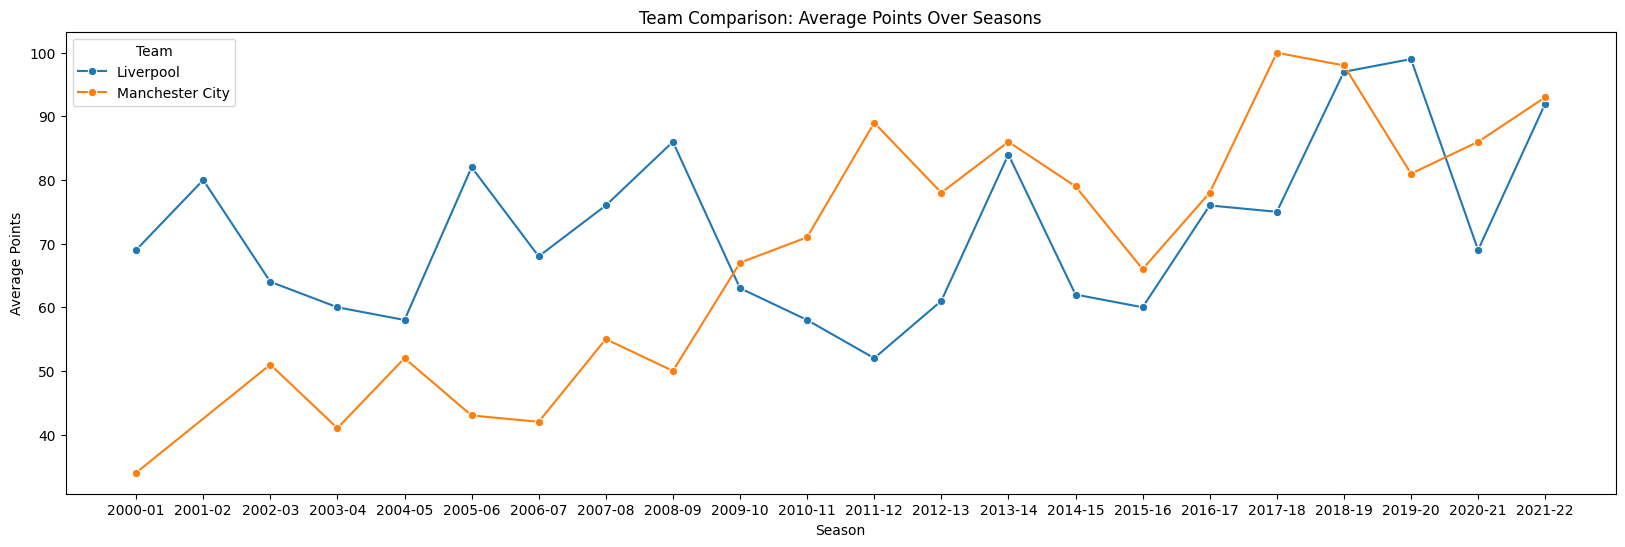

In [30]:
# Team Comparison Analysis
teams_to_compare = ['Manchester City', 'Liverpool']  # Replace with the teams you want to compare

# Filter data for selected teams
team_comparison_data = epl_con[epl_con['Team'].isin(teams_to_compare)]

# Group by team and season, calculate average points
team_comparison_stats = team_comparison_data.groupby(['Team', 'Season']).agg({'Pts': 'mean'}).reset_index()

# Plot Line Chart for Team Comparison
plt.figure(figsize=(20, 6))
sns.lineplot(x='Season', y='Pts', hue='Team', data=team_comparison_stats, marker='o')
plt.title('Team Comparison: Average Points Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Points')
plt.legend(title='Team')
plt.show()